In [344]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None

In [350]:
# Read in the data

df = pd.read_csv('/Users/roderickmirzakhanian/Downloads/movies.csv')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [352]:
# Check for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [354]:
# Remove missing data

df2 = df.dropna()

In [356]:
# Check new dataframe

for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [358]:
# Data types for the columns

print(df2.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [360]:
# Change data types to remove '.0'

df2['budget'] = df2['budget'].astype('int64')

df2['votes'] = df2['votes'].astype('int64')

df2['gross'] = df2['gross'].astype('int64')

df2['runtime'] = df2['runtime'].astype('int64')

df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [364]:
# Create correct year column

df2['yearcorrect'] = df2['released'].astype(str).str.extract(r'(\d{4})')


# Reorder columns

df2 = df2[list(('name', 'rating', 'genre', 'year', 'yearcorrect', 'released', 'score', 'votes', 'director', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime'))] 

df2.head(15)

,name,rating,genre,year,yearcorrect,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
5,Friday the 13th,R,Horror,1980,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95
6,The Blues Brothers,R,Action,1980,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133
7,Raging Bull,R,Biography,1980,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129
8,Superman II,PG,Action,1980,1981,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127
9,The Long Riders,R,Biography,1980,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100


In [366]:
# Order rows by highest grossing films

df2 = df2.sort_values(by = ['gross'], inplace = False, ascending = False)

df2

,name,rating,genre,year,yearcorrect,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,2015,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1993,1994,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2000,2001,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


In [368]:
# Hypothesis: Budget and companies have a high correlation with gross

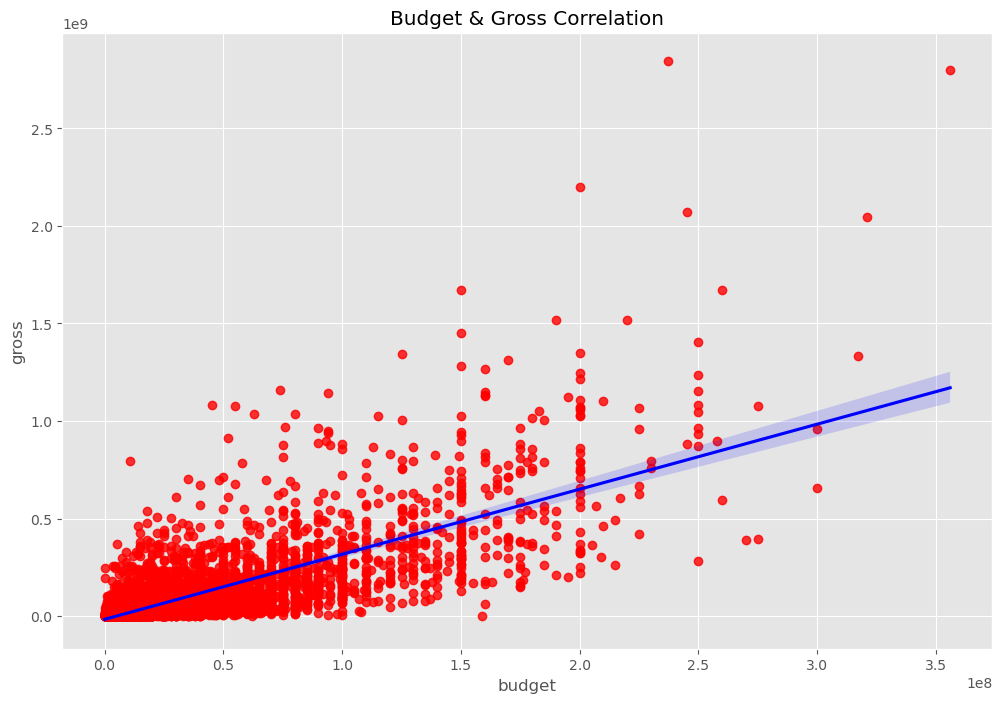

In [398]:
# Plot the budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df2, scatter_kws = {"color": "red"}, line_kws = {"color":"blue"})
plt.title('Budget & Gross Correlation')

plt.show()

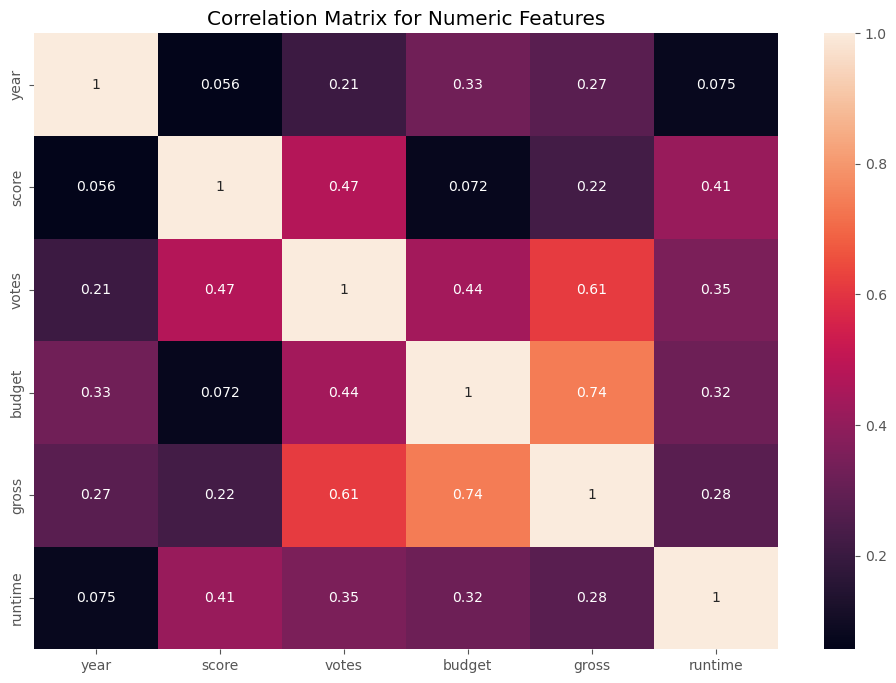

In [400]:
# Check the correlations of the numeric features in dataframe

correlation_matrix = df2.select_dtypes(include = ['int64', 'float64']).corr()

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')

plt.show()

In [374]:
# High correlation between budget and gross, first part of hypothesis is correct

# Check the second part of hypothesis: company and gross correlation

In [376]:
# Numerize all features of the dataframe

df2_numerized = df2

for col_name in df2_numerized.columns:
    if(df2_numerized[col_name].dtype == 'object'):
        df2_numerized[col_name] = df2_numerized[col_name].astype('category')
        df2_numerized[col_name] = df2_numerized[col_name].cat.codes

df2_numerized

,name,rating,genre,year,yearcorrect,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,29,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,39,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,17,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,35,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,38,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,35,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96
2434,2969,5,0,1993,14,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97
3681,1595,3,6,2000,21,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108
272,2909,6,9,1982,2,1525,3.9,2300,261,55,1473,47,800000,2270,582,85


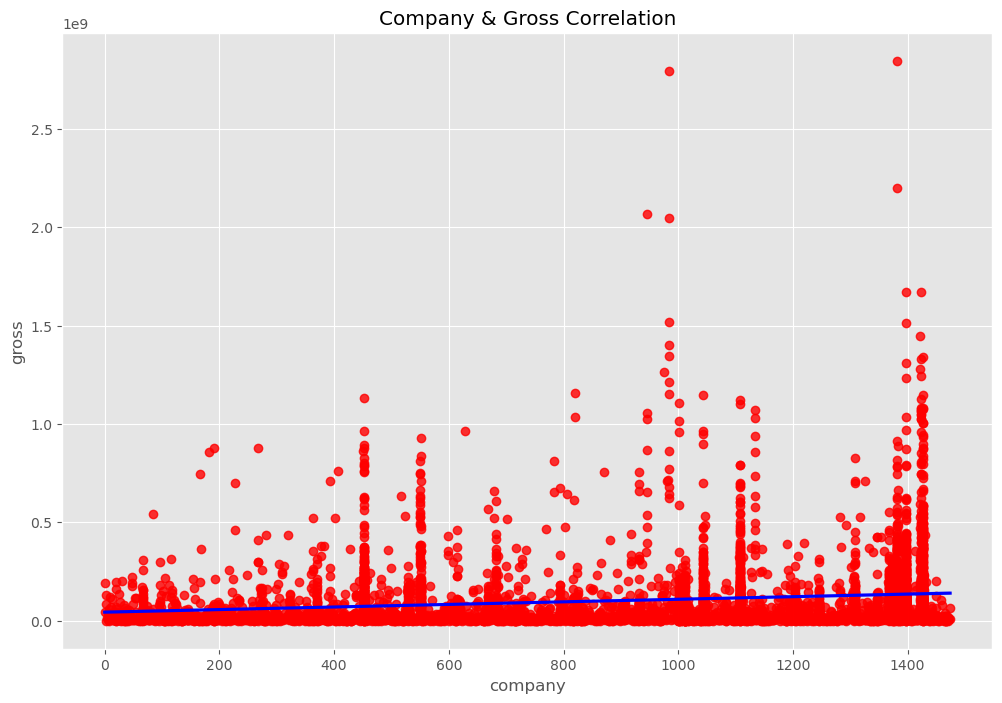

In [402]:
# Plot the company vs gross using seaborn

sns.regplot(x = 'company', y = 'gross', data = df2, scatter_kws = {"color": "red"}, line_kws = {"color":"blue"})
plt.title('Company & Gross Correlation')

plt.show()

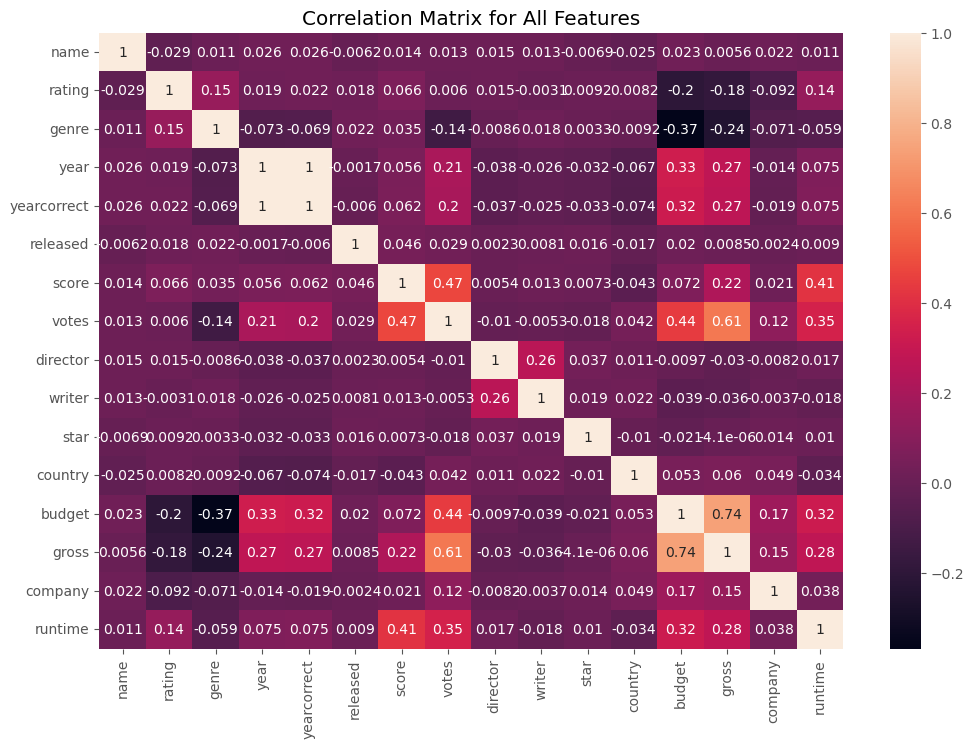

In [404]:
# Check the correlations of all features

correlation_matrix2 = df2_numerized.corr()

sns.heatmap(correlation_matrix2, annot = True)
plt.title('Correlation Matrix for All Features')

plt.show()

In [406]:
# Sort and filter out low correlations to make them easier to see

correlation_pairs = correlation_matrix2.unstack()

sorted_pairs = correlation_pairs.sort_values()

high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  year           0.998726
year         yearcorrect    0.998726
name         name           1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
yearcorrect  yearcorrect    1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
company      company        1.000000
runtime      runtime        1.000000
dtype: float64

In [392]:
# Low correlation between company and gross, second part of hypothesis is incorrect

# Votes and Budget have the highest correlation to gross earnings